In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [6]:
df = pd.read_csv('Online_Retail.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   541909 non-null  int64 
 1   Description  540455 non-null  object
 2   Quantity     541909 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 12.4+ MB


In [9]:
df.describe()

,Unnamed: 0,Quantity
count,541909.00000,541909.000000
mean,270954.00000,9.552250
std,156435.79785,218.081158
min,0.00000,-80995.000000
25%,135477.00000,1.000000
50%,270954.00000,3.000000
75%,406431.00000,10.000000
max,541908.00000,80995.000000


In [18]:
df.head()

,Unnamed: 0,Description,Quantity
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,WHITE METAL LANTERN,6
2,2,CREAM CUPID HEARTS COAT HANGER,8
3,3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,RED WOOLLY HOTTIE WHITE HEART.,6


In [72]:
# Kiểm tra dữ liệu khuyết thiếu
df.isna()
# Không loại bỏ dữ liệu khuyết thiếu 

,Unnamed: 0,Description,Quantity
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
541904,False,False,False
541905,False,False,False
541906,False,False,False
541907,False,False,False


In [19]:
df1 = df.dropna()
100*df1.shape[0]/df.shape[0]

99.73168926886248

In [55]:
# Thay thế giá trị khuyết thiếu của thuộc tính Description:
values = {'Description':'Không biết'}
df2 = df.fillna(value=values)
df2

,Unnamed: 0,Description,Quantity
0,0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,WHITE METAL LANTERN,6
2,2,CREAM CUPID HEARTS COAT HANGER,8
3,3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...
541904,541904,PACK OF 20 SPACEBOY NAPKINS,12
541905,541905,CHILDREN'S APRON DOLLY GIRL,6
541906,541906,CHILDRENS CUTLERY DOLLY GIRL,4
541907,541907,CHILDRENS CUTLERY CIRCUS PARADE,4


<AxesSubplot:xlabel='Quantity'>

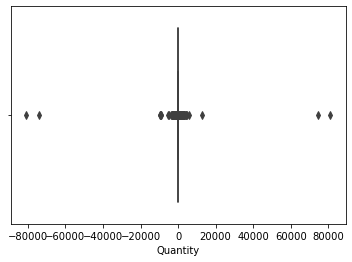

In [59]:
# Xác định giá trị ngoại lai
sns.boxplot(x = df2['Quantity'])

In [62]:
# Tính giá trị Q1, Q3
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3-Q1


/tmp/ipykernel_19256/3045347033.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df2.quantile(0.25)
/tmp/ipykernel_19256/3045347033.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df2.quantile(0.75)


/tmp/ipykernel_19256/4244681309.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df2[~((df2<(Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]


<AxesSubplot:xlabel='Quantity'>

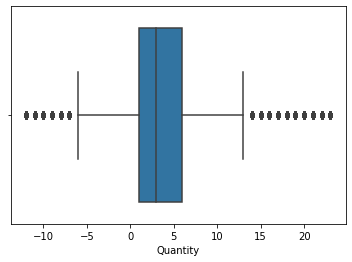

In [65]:
# Lọc dữ liệu ngoại lai
df3 = df2[~((df2<(Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]
df3
sns.boxplot(x = df3['Quantity'])

In [73]:
100*df3.shape[0]/df.shape[0]

89.18287018669186

In [ ]:
# Giá trị ngoại lai của Quantity có giá trị <0
